<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
# 데이터 불러오기
from google.colab import files
file_uploaded=files.upload()
import io
train=pd.read_csv(io.BytesIO(file_uploaded['movies_train.csv']))
train.head()

Saving movies_train.csv to movies_train (1).csv


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [7]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [9]:
pd.options.display.float_format = '{:.1f}'.format

In [10]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [11]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [12]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [13]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [14]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [15]:
train['release_time']=pd.to_datetime(train['release_time'])


#**3. 데이터 시각화 및 분석**

### 1. 장르별 스텝수 분석

In [17]:
#스태프수가 누적으로 많은 5개 장르가 무엇인지 알아보기
top5=train.groupby('genre')['num_staff'].sum().sort_values(ascending=False)[:5]
top5

genre
드라마       36351
코미디       11081
멜로/로맨스    10591
액션         9451
느와르        8399
Name: num_staff, dtype: int64

Text(0, 0.5, '스텝수')

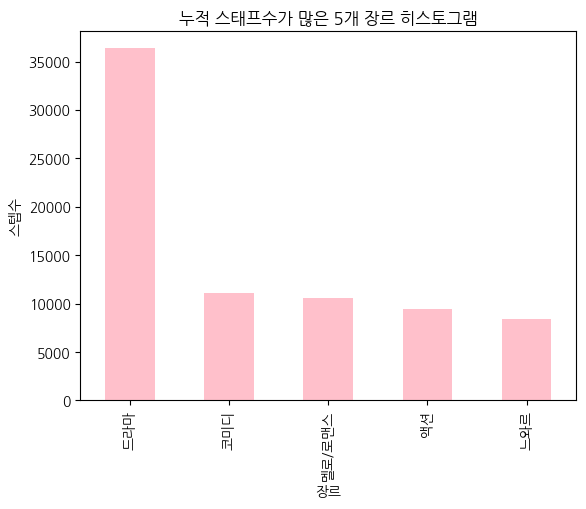

In [18]:
ax=top5.plot(kind='bar',color='pink')
ax.set_title('누적 스태프수가 많은 5개 장르 히스토그램')
ax.set_xlabel('장르')
ax.set_ylabel('스텝수')

In [19]:
#평균 스태프수가 가장많은 5개장르 알아보기
staff5= train[['genre','num_staff']].groupby('genre').mean()[:5]
staff5=staff5.sort_values(by=['num_staff'],ascending=False)
staff5

,num_staff
genre,
느와르,311.1
SF,197.3
공포,176.4
드라마,164.5
다큐멘터리,17.8


Text(0, 0.5, '스텝수')

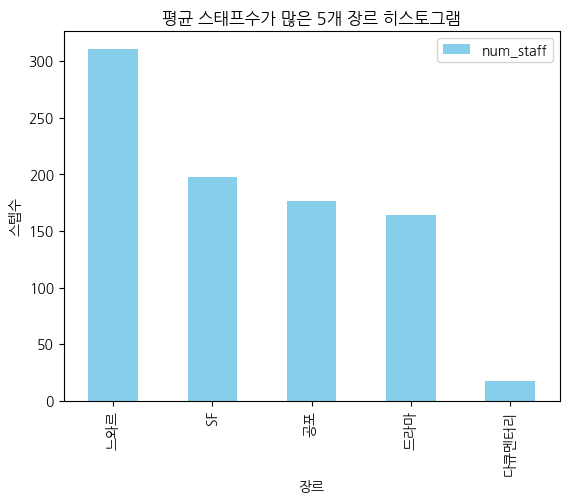

In [20]:
ax=staff5.plot(kind='bar', color='skyblue')
ax.set_title('평균 스태프수가 많은 5개 장르 히스토그램')
ax.set_xlabel('장르')
ax.set_ylabel('스텝수')

**결과**
* 누적 스태프수가 많은 장르가 평균적으로 스태프수가 많은 장르가 아니다.
* 평균적으로 느와르, SF, 공포, 드라마, 다큐멘터리 순서로 스태프수가 많이 필요하다.
* 느와르가 다큐멘터리보다 필요한 스태프수가 2배이상 많다.

### 2. 평균 관객수가 이전에 많은 감독일수록 현재 관객수가 많은지 확인하기

In [21]:
train['dir_prev_bfnum'].sort_values(ascending=False)

338   17615314.0
214    8801639.0
16     8223342.0
118    7855474.0
409    7838528.5
         ...    
256          0.0
254          0.0
250          0.0
249          0.0
599          0.0
Name: dir_prev_bfnum, Length: 600, dtype: float64

In [39]:
def topdirector(x):
  if ((x>100000)==True):
    return 'top1'
  elif((x>1000)&(x<=100000)):
    return 'top2'
  elif((x>100)&(x<=1000)):
    return 'top3'
  else:
    return'top4'

In [41]:
train['top_director']=train['dir_prev_bfnum'].apply(topdirector)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,top_director,people,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,top4,93,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,top1,390,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,top1,347,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,top2,26,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,top4,253,2010,11,4,3


In [42]:
train[['top_director','box_off_num']].groupby('top_director').mean().sort_values('box_off_num')

,box_off_num
top_director,
top3,291262.2
top4,352322.5
top2,474081.8
top1,1538692.5


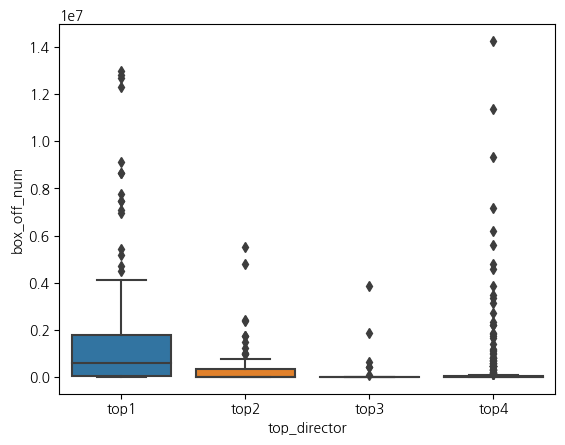

In [43]:
ax=plt.subplots()
ax=sns.boxplot(x='top_director',y='box_off_num',data=train, order=['top1','top2','top3','top4'])
ax.set_title('평균 스태프수가 많은 5개 장르 히스토그램')
ax.set_xlabel('장르')
ax.set_ylabel('스텝수')

**결과**
* 평균 관객수가 이전에 많은 감독일수록 현재 관객수가 많은 경향은 있지만 이상점들이 많이 존재하여 단정지을 수 없다.
* 이전 작품이 없는 감독들은 모두 top4그룹에 속해있어 일반화하기 어렵다.

### 3. 상영등급별 필요 인력수를 장르별로 확인하기

In [25]:
#전체 필요인력수는 people로 할당
train['people']=train['num_staff']+train['num_actor']
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,top_director,people
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,top2,93
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,top2,390
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,top2,347
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,top2,26
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,top2,253


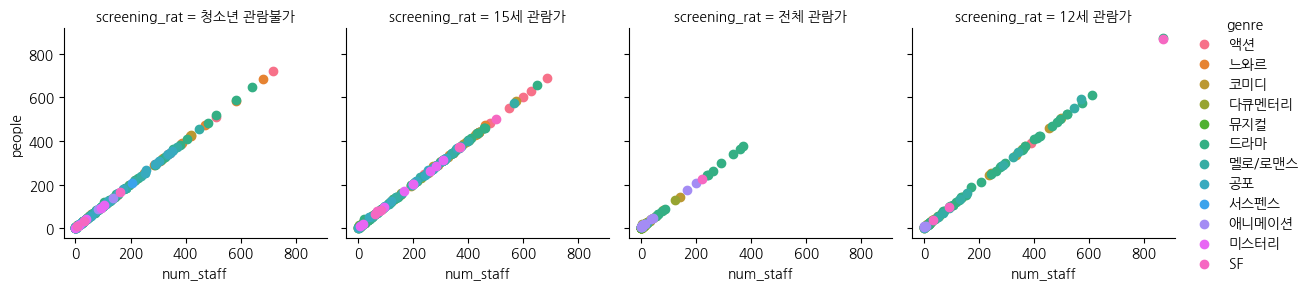

In [26]:
facet=sns.FacetGrid(train,col='screening_rat',hue='genre')
facet.map(plt.scatter,'num_staff','people')
facet=facet.add_legend()

**결과**
* 전체관람가인 영화일수록 다른 영화에 비해 인력이 적게 필요하였다.


### 4. 주연배우수에 따른 관객수 조사


Text(0, 0.5, '관객수')

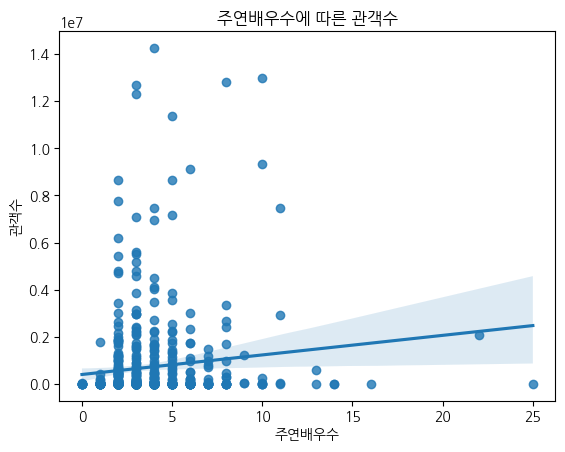

In [45]:
ax=plt.subplots()
ax=sns.regplot(x='num_actor',y='box_off_num',data=train)
ax.set_title('주연배우수에 따른 관객수')
ax.set_xlabel('주연배우수')
ax.set_ylabel('관객수')

**결과**
* scatterplot을 통해 주연배우수에 따른 관객수의 산점도가 회귀그래프 바깥쪽으로 고르게 퍼져있으므로 유의한 상관관계를 따른다고 볼 수 없다.
